In [149]:
import pandas as pd
import numpy as np

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selection 

from scipy.stats import chi2_contingency

# Training

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [150]:
df = pd.read_csv('Steel_industry_data.csv')

In [151]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [152]:
df.shape

(35040, 11)

In [153]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [154]:
# Renomeando Coluna

df = df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 'CO2(tCO2)' : 'CO2'})

# Deixando tudo em letras minúsculas

df.columns = df.columns.str.lower()

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   usage_kwh                             35040 non-null  float64
 2   lagging_current_reactive_power_kvarh  35040 non-null  float64
 3   leading_current_reactive_power_kvarh  35040 non-null  float64
 4   co2                                   35040 non-null  float64
 5   lagging_current_power_factor          35040 non-null  float64
 6   leading_current_power_factor          35040 non-null  float64
 7   nsm                                   35040 non-null  int64  
 8   weekstatus                            35040 non-null  object 
 9   day_of_week                           35040 non-null  object 
 10  load_type                             35040 non-null  object 
dtypes: float64(6), 

In [156]:
df.describe()

,usage_kwh,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2,lagging_current_power_factor,leading_current_power_factor,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


# Feature Engeniring

In [157]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

In [158]:
print('A primeira data é', df.index[0] , 'e a ultima é', df.index[-1])

A primeira data é 2018-01-01 00:15:00 e a ultima é 2018-12-31 00:00:00


In [159]:
#Criando a coluna das horas

df['hour'] = df.index.hour
df['day'] = df.index.day

In [160]:
# Separar os numéricos dos categóricos

numeric = ['usage_kwh', 'lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm', 'hour', 'day']

categoricos = ['weekstatus', 'day_of_week', 'load_type']

# Limpeza

In [161]:
df.isnull().any()

usage_kwh                               False
lagging_current_reactive_power_kvarh    False
leading_current_reactive_power_kvarh    False
co2                                     False
lagging_current_power_factor            False
leading_current_power_factor            False
nsm                                     False
weekstatus                              False
day_of_week                             False
load_type                               False
hour                                    False
day                                     False
dtype: bool

In [162]:
# Resetar o índice para que a data seja uma coluna regular e criar um dataset de verificação
df_v = df.reset_index()
df_v['date'] = pd.to_datetime(df_v['date'])

# Verificar duplicatas com base na data e hora
duplicatas = df_v.duplicated(subset='date')
existem_duplicatas = duplicatas.any()

print(existem_duplicatas)

False


# Análise Exploratória

### Uso de energia ao longo do tempo

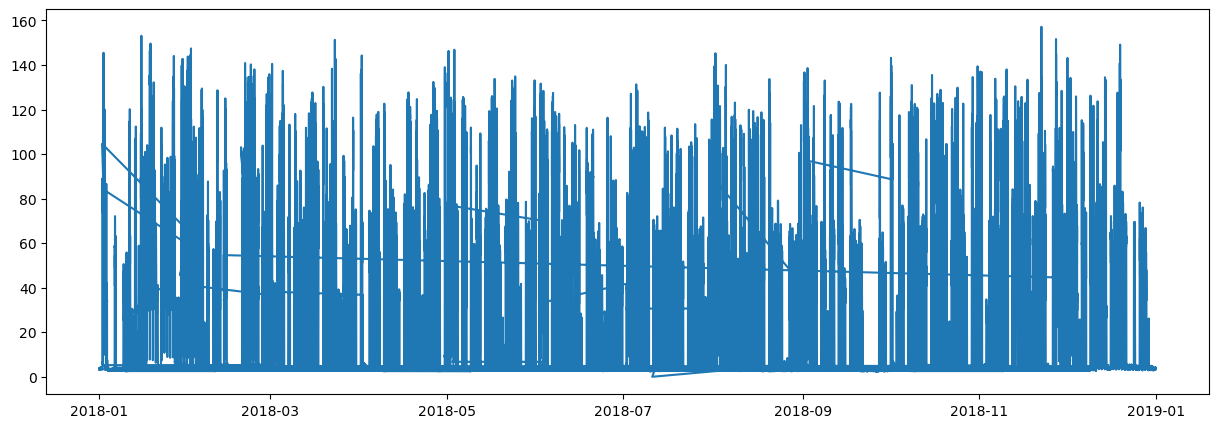

In [163]:
# Visualizando a variação do uso de energia ao longo do ano

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df.index, df['usage_kwh'])

plt.show()

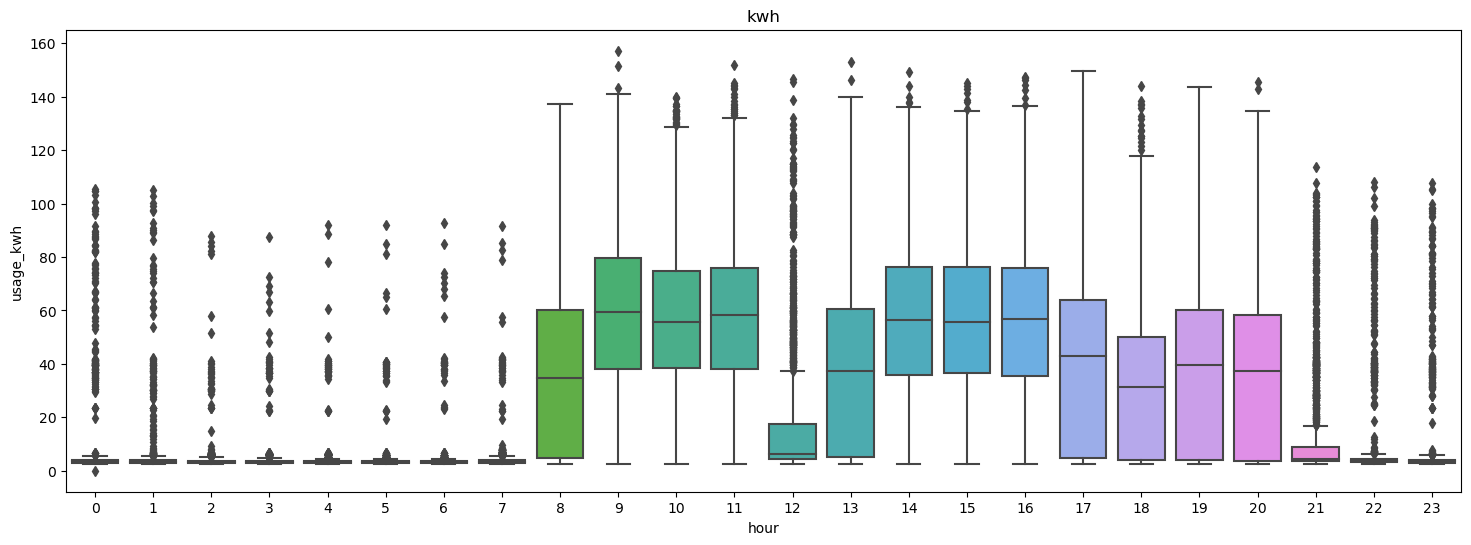

In [164]:
# Visualizando com boxplot a variação do uso de energia pelas horas do dia


fig, axes = plt.subplots(1, 1, figsize=(18, 6))


axes.set_title('kwh')
sns.boxplot(data=df, x='hour', y='usage_kwh')

plt.show()


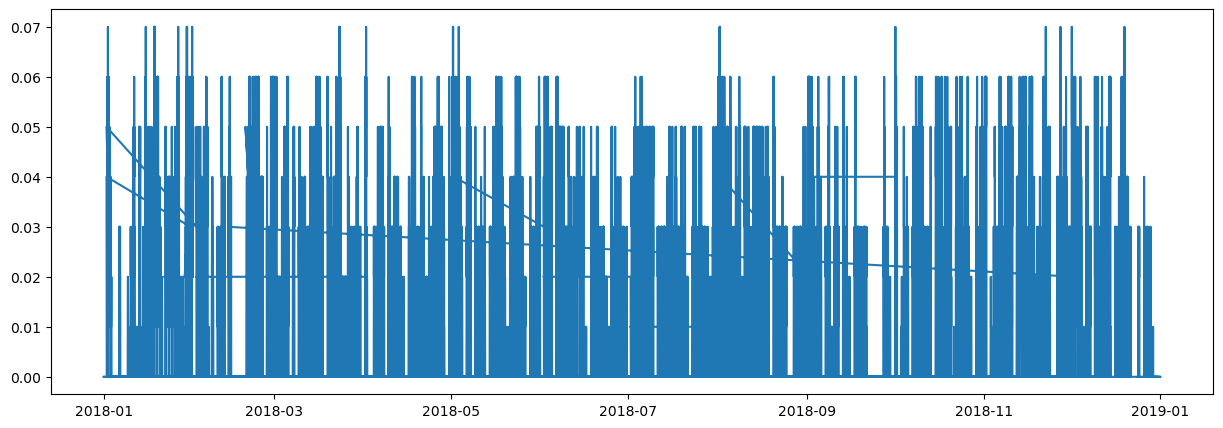

In [165]:
# Visualizando a variação de emissão de co2 ao longo do ano

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df.index, df['co2'])

plt.show()

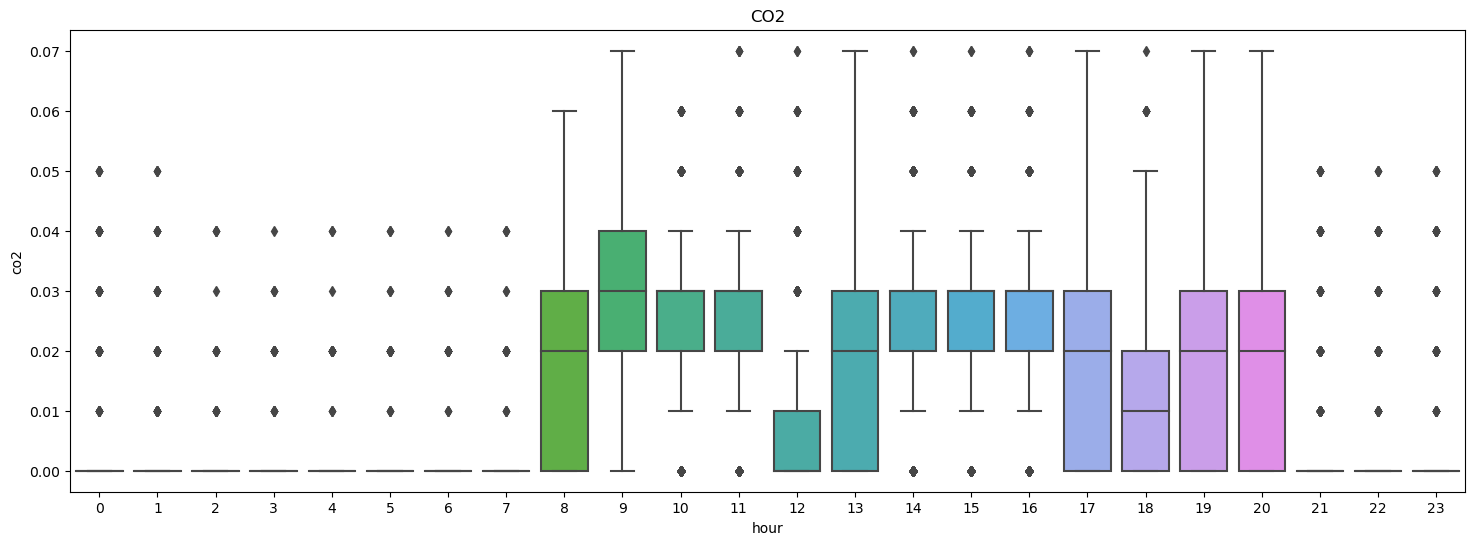

In [166]:
# Visualizando com boxplot a variação de emissão de co2 pelas horas do dia


fig, axes = plt.subplots(1, 1, figsize=(18, 6))


axes.set_title('CO2')
sns.boxplot(data=df, x='hour', y='co2')

plt.show()


In [167]:
categoricos = ['weekstatus', 'day_of_week', 'load_type']

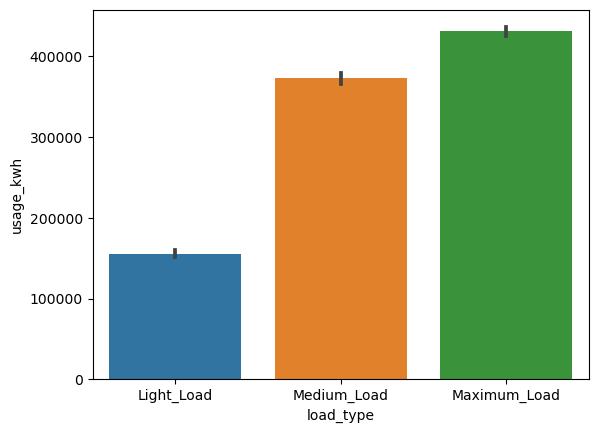

In [168]:
# Visualizando o uso de energia por load_type

sns.barplot(data = df, x = df['load_type'], y = df['usage_kwh'], estimator=sum)

plt.show()

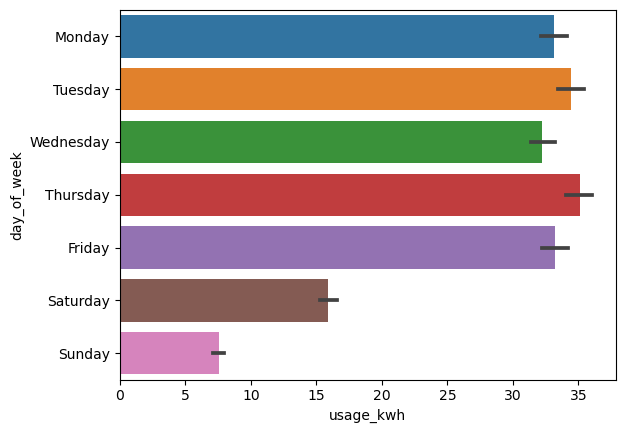

In [169]:
# Visualizando o uso de energia por dia da semana

sns.barplot(data = df, y = df['day_of_week'], x = df['usage_kwh'], estimator='mean')
plt.show()

In [170]:
# Vamos ver a distribuição dos dados das colunas numéricas


def plot_histograms(dataset, columns):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))
    fig.tight_layout(pad=5.0)
    
    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2
        
        sns.histplot(data=dataset, x=column, ax=axes[row, col])
        
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequência')
        axes[row, col].set_title(f'Histograma de {column}')
    
    plt.tight_layout()
    display(fig)
    plt.close(fig)

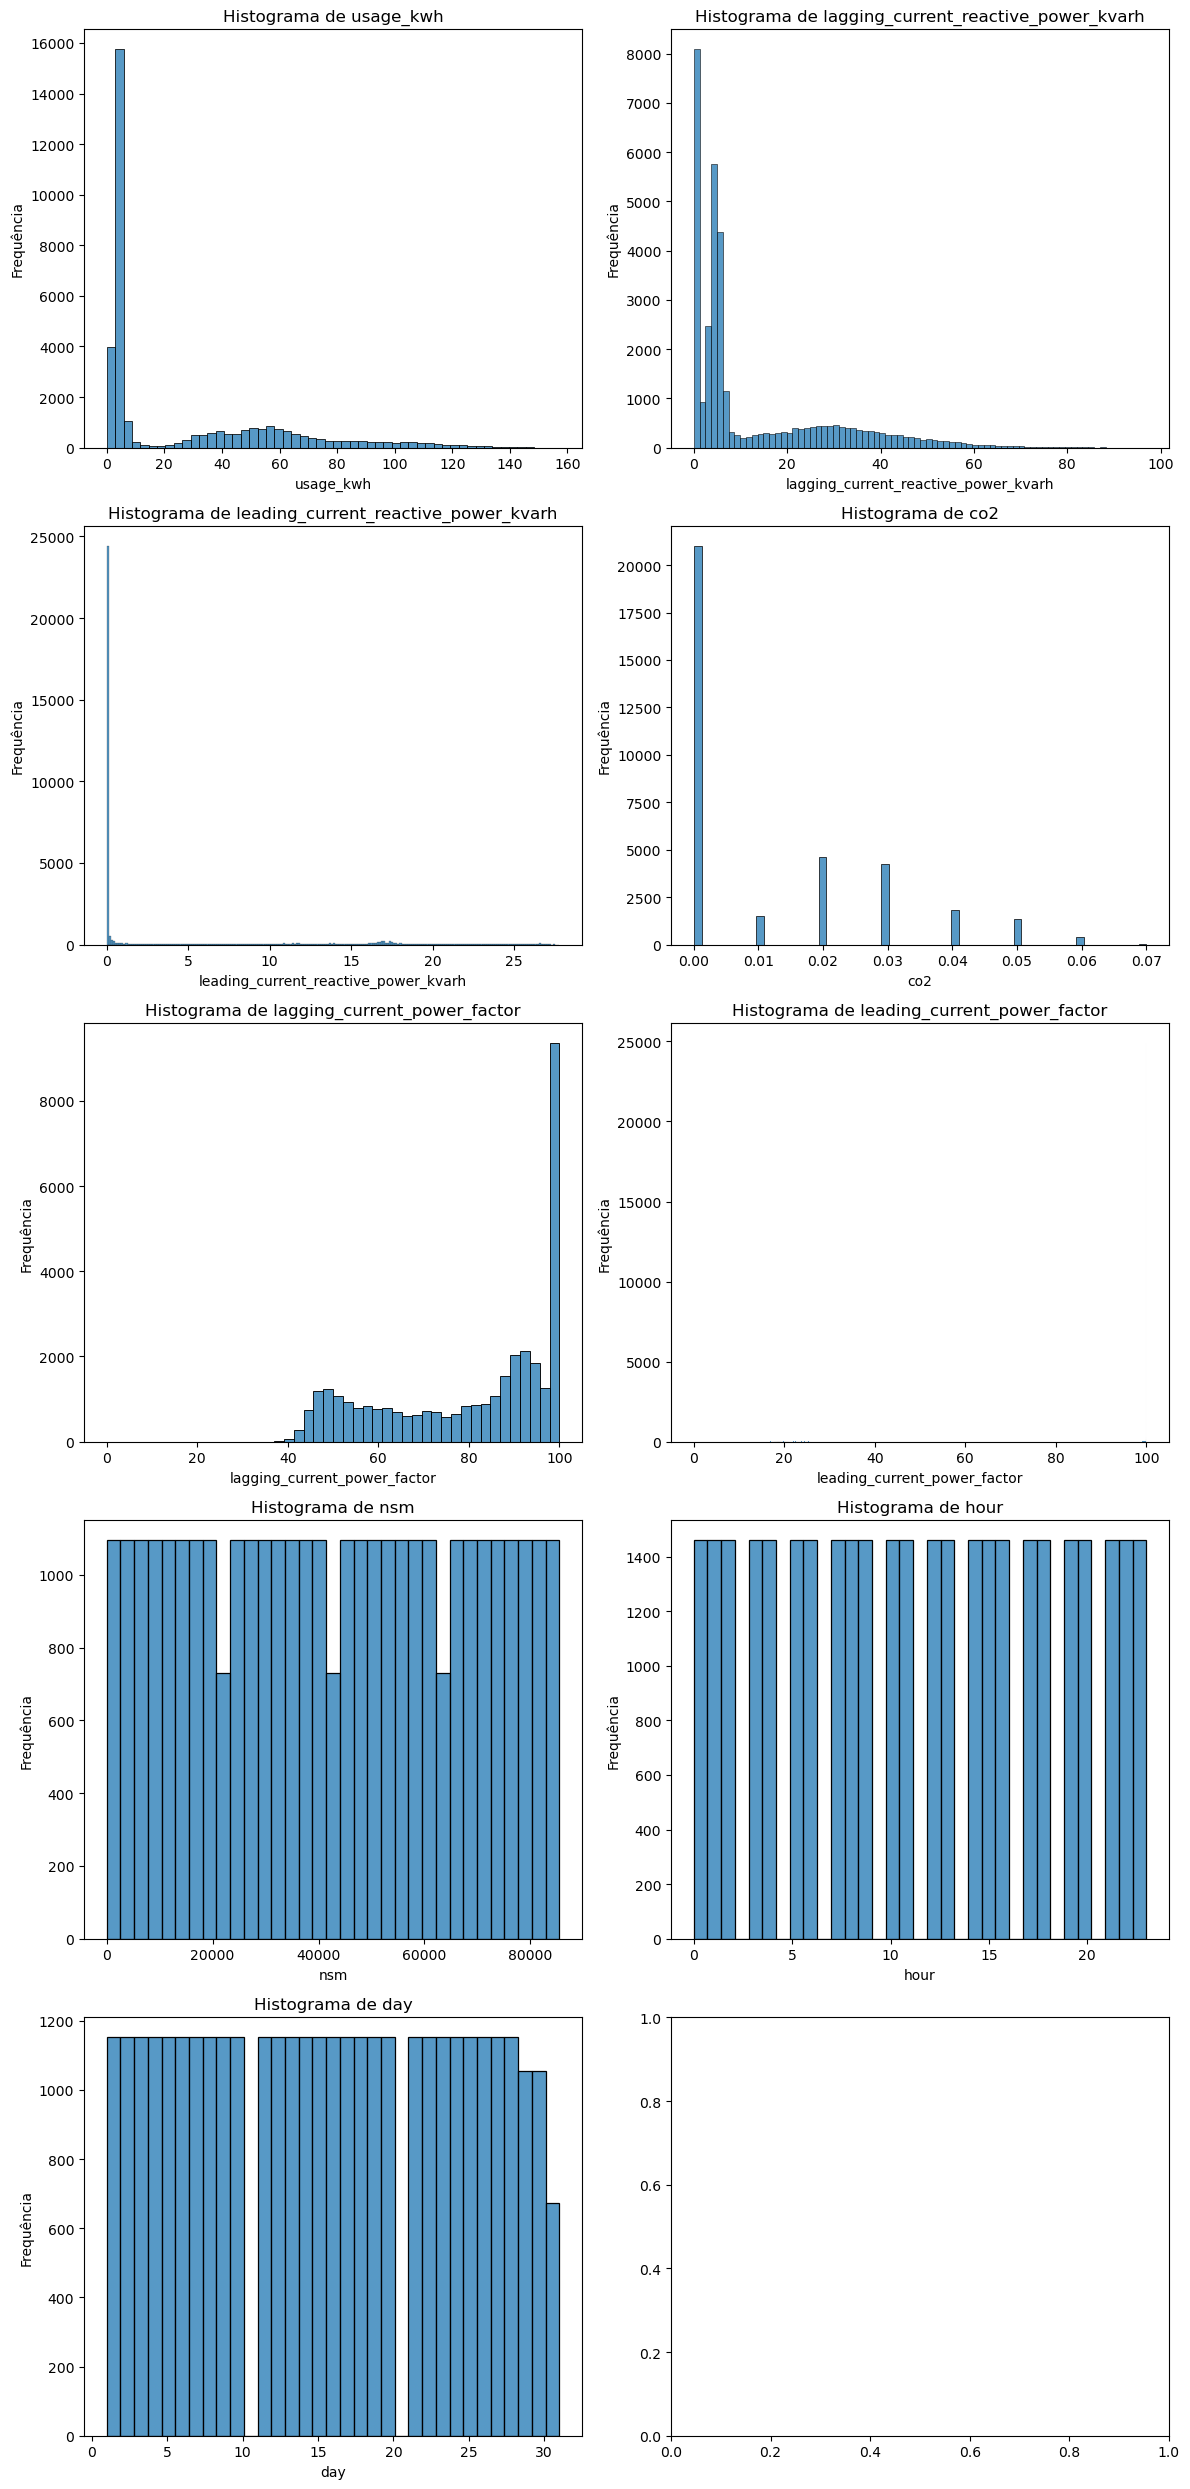

In [171]:
plot_histograms(df, numeric)

Pela distribuição dos dados vemos que existem muitos registros de um baixo uso de energia, sendo entre 0 e 10 a maior frequência. Essa tendência então é naturalmente seguida por 'Lagging_Current_reactive_power', emissão de co2. E é inverso a distribuição de 'Lagging_Current_Power_Factor' e 'Lagging_Current_Power_Factor', os quais têm sua maiores frequências os registros mais altos (próximos a 100).

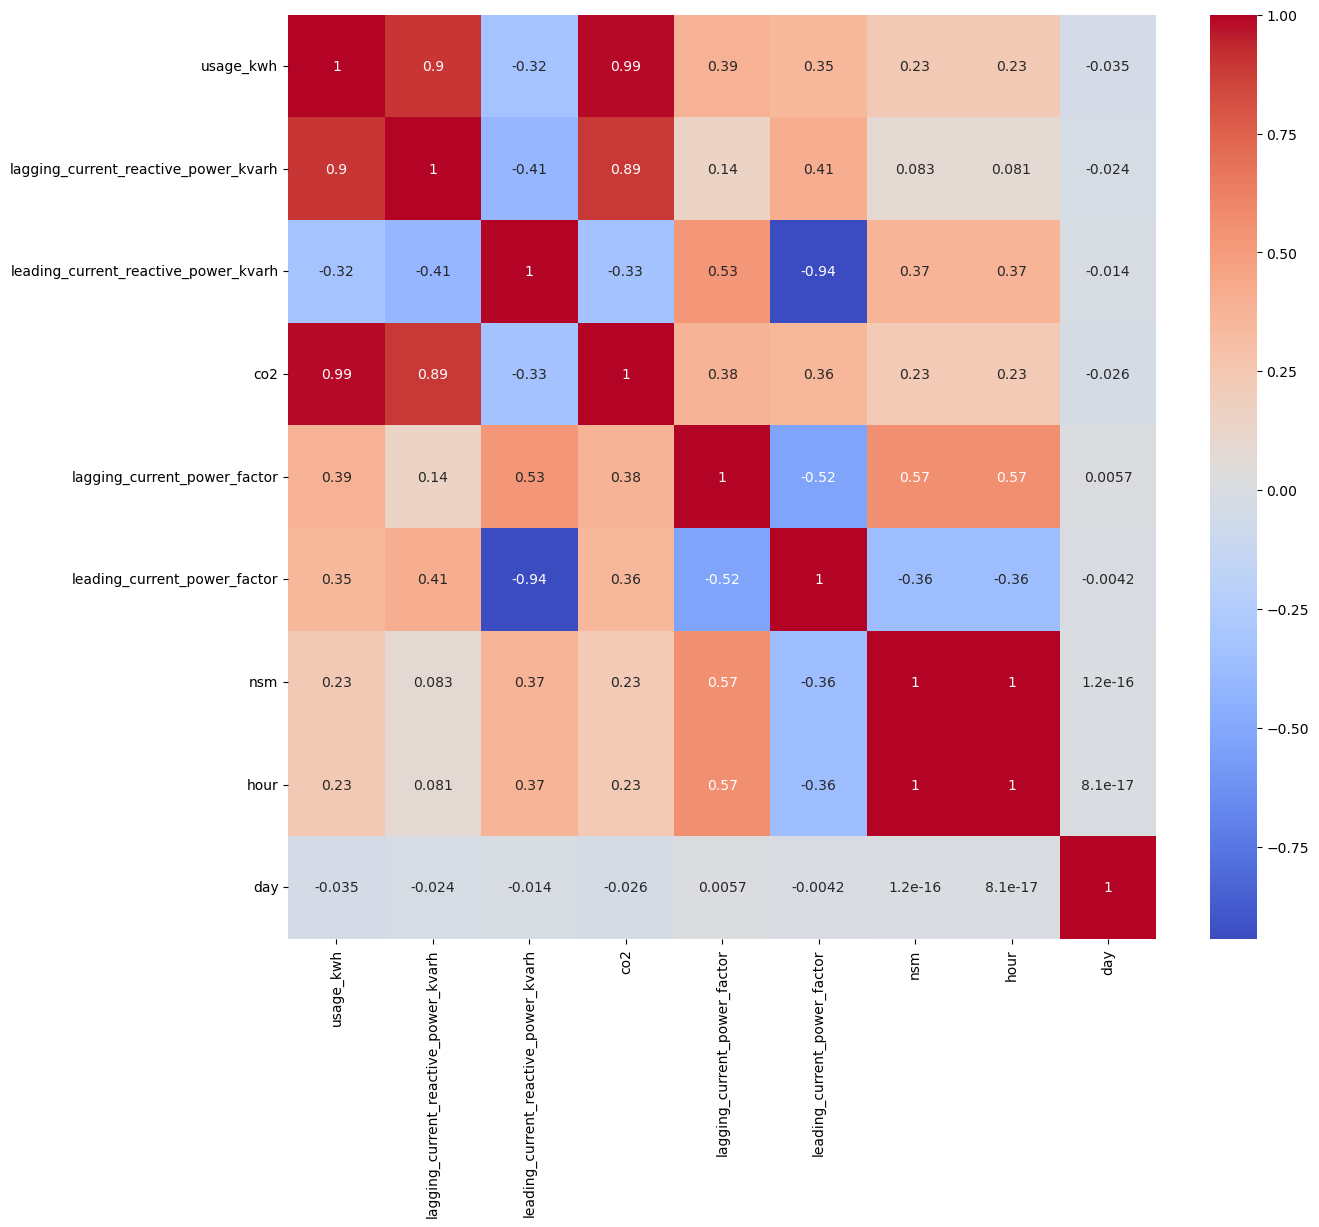

In [172]:
# Criando a matriz de correlação
corr_matrix = df.corr(numeric_only = [True])

# Criando um heatmap da matriz de correlação

plt.figure(figsize = (14,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

Já podemos notar a alta correlação da variável 'uso de energia' com a de emissão de co2 e Lagging Current reactive power.

# Pre process

### Enconding

In [173]:
# A variavel dia da semana e load_type sera decomposta em variaveis dummy

df = pd.get_dummies(df)
df.head()

,usage_kwh,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2,lagging_current_power_factor,leading_current_power_factor,nsm,hour,day,weekstatus_Weekday,...,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,load_type_Light_Load,load_type_Maximum_Load,load_type_Medium_Load
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,1,...,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,1,...,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,1,...,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,1,...,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,1,1,...,0,1,0,0,0,0,0,1,0,0


### Split

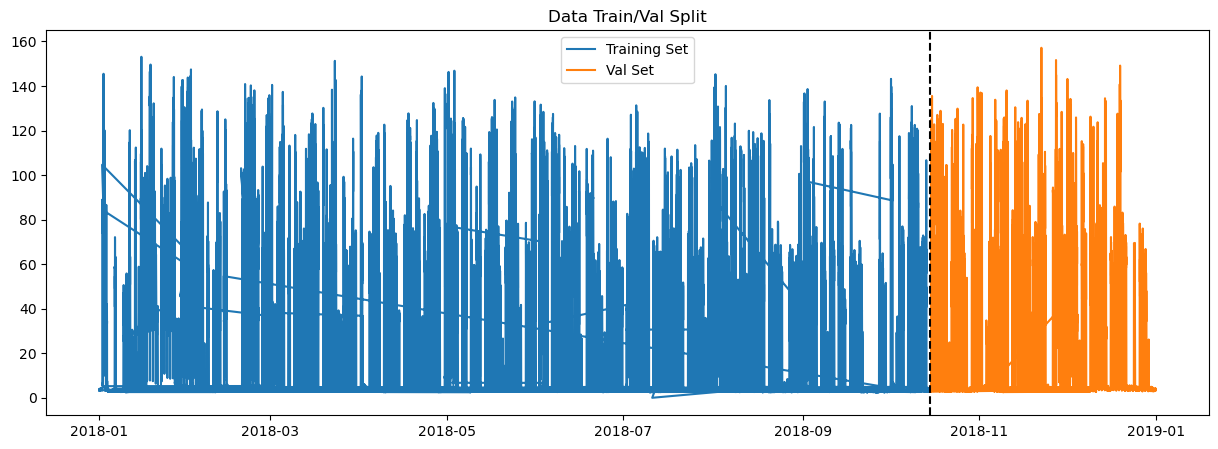

In [174]:
# Separar em treino e validação por uma data limite, escolhemos separar no meio de outubro:

train = df.loc[df.index < '2018-10-15']
val = df.loc[df.index >= '2018-10-15']

# Vamos ver graficamente como ficou a separação dos dados

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(train.index, train['usage_kwh'], label='Training Set')
ax.plot(val.index, val['usage_kwh'], label='Val Set')
ax.set_title('Data Train/Val Split')

ax.axvline(np.datetime64('2018-10-15'), color='black', ls='--')
ax.legend(['Training Set', 'Val Set'])
plt.show()

In [175]:
FEATURES =['lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'hour', 'day', 'weekstatus_Weekday', 'weekstatus_Weekend',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'load_type_Light_Load',
       'load_type_Maximum_Load', 'load_type_Medium_Load']

TARGET = ['usage_kwh']



#Split final


X_train = train[FEATURES]
y_train = train[TARGET]

X_val = val[FEATURES]
y_val = val[TARGET]

# Criando modelo

### XGboost

In [176]:
reg = XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=500,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth= 4,
                       learning_rate=0.05)


reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=100)

[13:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.63137	validation_1-rmse:41.36136
[100]	validation_0-rmse:2.82701	validation_1-rmse:2.71934
[200]	validation_0-rmse:2.30670	validation_1-rmse:2.18004
[300]	validation_0-rmse:1.97234	validation_1-rmse:1.85554
[400]	validation_0-rmse:1.72014	validation_1-rmse:1.60308
[499]	validation_0-rmse:1.52142	validation_1-rmse:1.41880


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

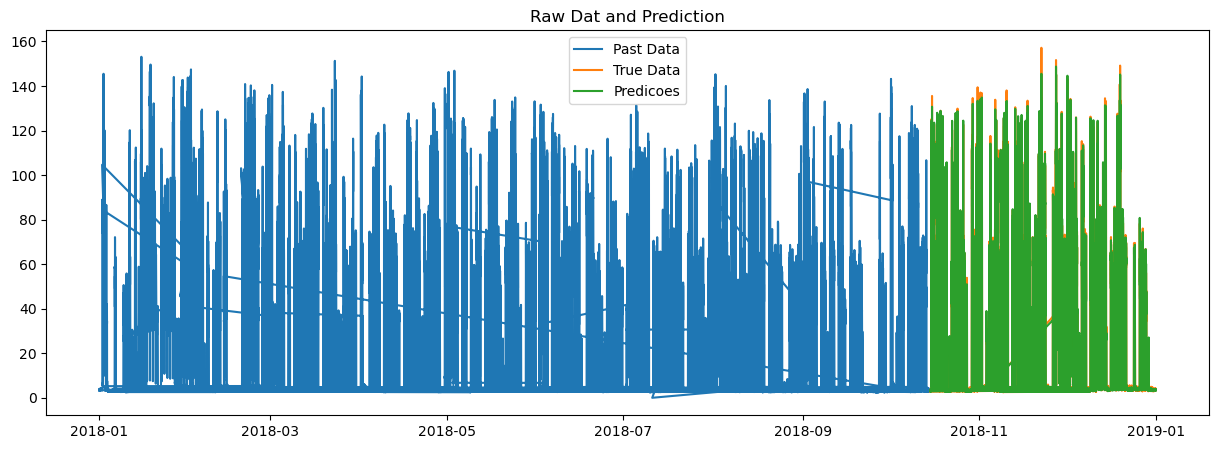

In [177]:
# Vamos ver graficamente a predição


val['predict_kwh'] = reg.predict(X_val)


fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(train.index, train['usage_kwh'], label='Training Set')
ax.plot(val.index, val['usage_kwh'], label='Val Set')
ax.plot(val.index, val['predict_kwh'], label='predict')



plt.legend(['Past Data', 'True Data', 'Predicoes'])
ax.set_title('Raw Dat and Prediction')
plt.show()

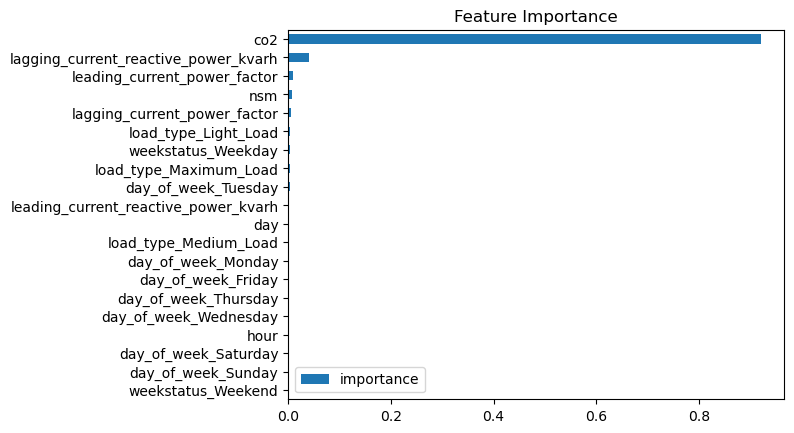

In [178]:
#Vamos ver a importância de cada variavél e plotar um gráfico de barras para visualizar.

fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Analisando a importância de cada feature, podemos ver que a quantidade de co2 emitida é de longe a mais relevante para explicar o consumo de energia

# Métricas

In [179]:
# As métricas obtidas pelo XGboost

mse = mean_squared_error(val['usage_kwh'], val['predict_kwh'])
rmse = np.sqrt(mean_squared_error(val['usage_kwh'], val['predict_kwh']))
mae = mean_absolute_error(val['usage_kwh'], val['predict_kwh'])
r2 = r2_score(val['usage_kwh'], val['predict_kwh'])



print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

Mean Squared Error: 2.012996874271639
Root Mean Squared Error (RMSE): 1.4188012102728271
Mean Absolute Error (MAE): 0.8187427474622034
R2 Score: 0.9982582006325766
